<a href="https://colab.research.google.com/github/urobo12/DA-4/blob/main/04%EC%A1%B0_%EB%B6%84%EC%84%9D%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석 4조


In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [7]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

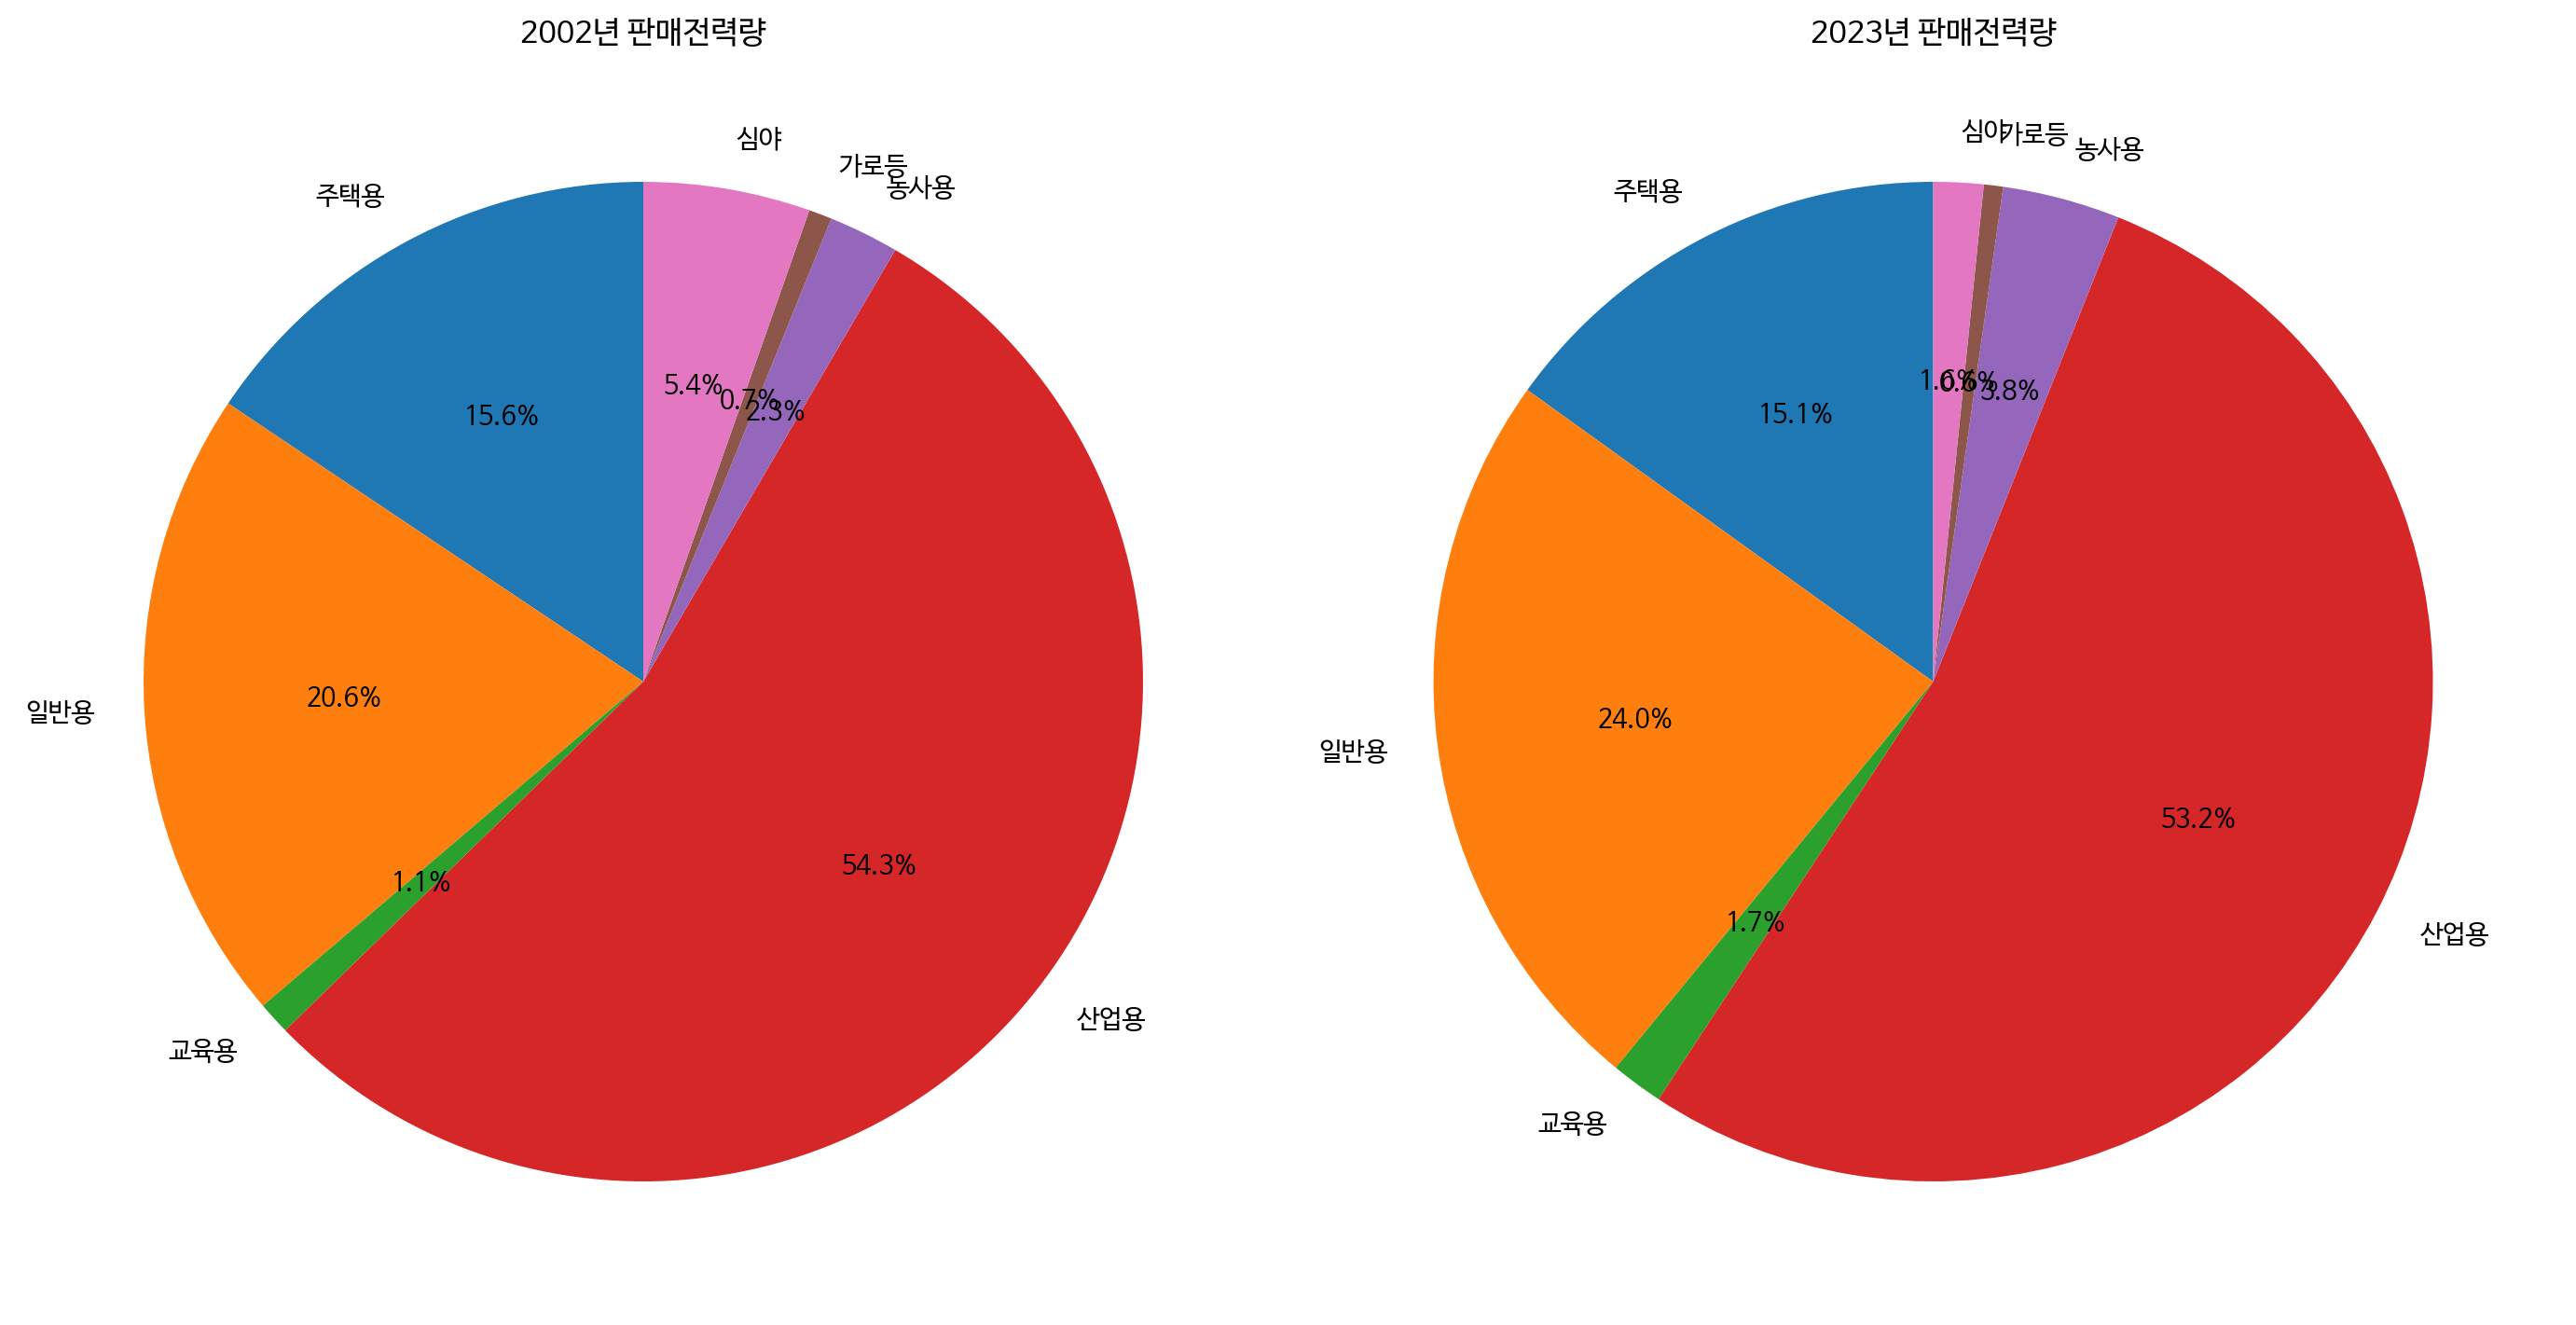

In [24]:

import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로
file_path = '연도별_전력수급_실적_20241118164007.csv'
# 한글폰트(코랩용)
plt.rc('font', family='NanumBarunGothic')
# CSV 파일 로드
data = pd.read_csv(file_path, encoding='cp949')

# 필요한 카테고리 선택
categories = [
    '주택용판매전력량 (백만kWh)', '일반용판매전력량 (백만kWh)', '교육용판매전력량 (백만kWh)',
    '산업용판매전력량 (백만kWh)', '농사용판매전력량 (백만kWh)', '가로등판매전력량 (백만kWh)',
    '심야판매전력량 (백만kWh)'
]

# 간단한 이름으로 대체
simple_labels = ['주택용', '일반용', '교육용', '산업용', '농사용', '가로등', '심야']

# 해당 데이터 필터링
filtered_data = data[data['실적구분별(1)'].isin(categories)]

# 2002년과 2023년 데이터 추출
data_2002 = filtered_data[['실적구분별(1)', '2002']].set_index('실적구분별(1)')
data_2023 = filtered_data[['실적구분별(1)', '2023']].set_index('실적구분별(1)')

# 결측치 제거 및 값 변환
data_2002 = data_2002.dropna().astype(float)
data_2023 = data_2023.dropna().astype(float)

# 원그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# 2002년 그래프
axes[0].pie(data_2002['2002'], labels=simple_labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('2002년 판매전력량')

# 2023년 그래프
axes[1].pie(data_2023['2023'], labels=simple_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('2023년 판매전력량')

plt.tight_layout()
plt.show()
